`conda install numpy pandas matplotlib seaborn natsort`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# minor ticks
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from natsort import natsorted

In [2]:
variables = ['pr', 'psl', 'sftlf', 'tas', 'tasmin', 'tasmax']

def plot(df):
    axes = sns.heatmap(df.sort_index(), square=True, cbar=False, yticklabels=True)

    # Grid
    locator = MultipleLocator(1)
    locator.MAXTICKS = 2000
    axes.xaxis.set_minor_locator(locator)
    axes.yaxis.set_minor_locator(locator)
    plt.grid(b=True, axis='x', which='minor', color='#666666', linestyle='-')
    plt.grid(b=True, axis='y', which='minor', color='#666666', linestyle='-')

    # Labels
    axes.tick_params('x', top=True, labeltop=True, labelrotation=60)

def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

## Load and merge data

In [3]:
day = pd.read_csv("CMIP6day.csv", index_col="dataset_id", dtype={'pr': np.int32, 'psl': np.int32, 'sftlf': np.int32, 'tas': np.int32, 'tasmin': np.int32, 'tasmax': np.int32})
mon = pd.read_csv("CMIP6mon.csv", index_col="dataset_id", dtype={'pr': np.int32, 'psl': np.int32, 'sftlf': np.int32, 'tas': np.int32, 'tasmin': np.int32, 'tasmax': np.int32})

In [4]:
mi = pd.MultiIndex.from_product([['day', 'mon'], ['size']+variables], names=['freq', 'var'])
merged = day.merge(mon, on="dataset_id", how="outer").fillna(0)
merged.columns = mi

In [5]:
merged['total_size'] = merged.loc[:, (slice(None),'size')].sum(axis=1)

In [6]:
merged.head()

freq                                                         day            \
var                                                         size   pr  psl   
dataset_id                                                                   
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn   4.043522e+10  1.0  1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  4.095503e+10  0.0  0.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...  4.095443e+10  0.0  0.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...  4.095422e+10  0.0  0.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...  4.094936e+10  0.0  0.0   

freq                                                                         \
var                                                sftlf  tas tasmin tasmax   
dataset_id                                                                    
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    1.0  1.0    1.0    1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...   0.0  1.0    1.0    1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...   0.0  1.0    1.0    1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...   0.0  1.0    1.0    1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...   0.0  1.0    1.0    1.0   

freq                                                         mon            \
var                                                         size   pr  psl   
dataset_id                                                                   
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn   8.035808e+08  1.0  1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  1.781623e+09  0.0  1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...  1.781762e+09  0.0  1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...  1.781724e+09  0.0  1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...  1.781603e+09  0.0  1.0   

freq                                                                         \
var                                                sftlf  tas tasmin tasmax   
dataset_id                                                                    
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    1.0  1.0    0.0    0.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...   0.0  1.0    1.0    1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...   0.0  1.0    1.0    1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...   0.0  1.0    1.0    1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...   0.0  1.0    1.0    1.0   

freq                                                  total_size  
var                                                               
dataset_id                                                        
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn   4.123880e+10  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  4.273666e+10  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...  4.273620e+10  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...  4.273594e+10  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...  4.273096e+10

Number of datasets:

In [7]:
n=len(merged)
size_mon=sizeof_fmt(merged.loc[:, ('mon','size')].sum())
size_day=sizeof_fmt(merged.loc[:, ('day','size')].sum())
size_total=sizeof_fmt(merged['total_size'].sum())

print(f'Number of datasets: {n}')
print(f'Size (monthly): {size_mon}')
print(f'Size (daily): {size_day}')
print(f'Size (total): {size_total}')

Number of datasets: 1068
Size (monthly): 622.6GiB
Size (daily): 15.4TiB
Size (total): 16.0TiB


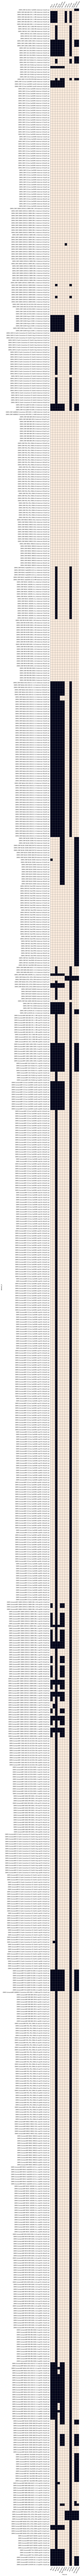

In [8]:
fig, ax = plt.subplots()
plot(merged.loc[:, (['day', 'mon'], variables)])
fig.set_size_inches(7, 400, forward=True)
plt.show()

## Export unique runs for daily variables

Get the run with most variables. For runs with the same number of variables, select the lowest run based on natural order (eg. **r1i1p1f1** < r1i1p1f2 < r1i1p3f1 < r2i1p1f1)

Temporally exclude *experiment_id=esm-hist* and exclude models `BCC.BCC-ESM1, CCCR-IITM.IITM-ESM, DKRZ.MPI-ESM1-2-HR, E3SM-Project.E3SM-1-0, E3SM-Project.E3SM-1-1-ECA, E3SM-Project.E3SM-1-1, MOHC.HadGEM3-GC31-MM, MPI-M.MPI-ESM1-2-HR, NASA-GISS.GISS-E2-1-G-CC, NASA-GISS.GISS-E2-1-H, NCAR.CESM2-FV2.historical, NCC.NorCPM1.historical, NIMS-KMA.UKESM1-0-LL.historical, SNU.SAM0-UNICON.historical`

In [9]:
daily = merged['day']
daily.loc[:, 'group'] = daily.index.str.replace('\.r[0-9]+i[0-9]+p[0-9]+f[0-9]+', '')
members = daily.index.str.extract('(r[0-9]+i[0-9]+p[0-9]+f[0-9]+)', expand=False)
daily.loc[:, 'member_id'] = pd.Categorical(members, ordered=True, categories=natsorted(members.unique()))
daily.loc[:,'nvariables'] = daily.loc[:, variables].sum(axis=1)

daily_max_vars = (daily.sort_values(['group', 'nvariables', 'member_id'], ascending=[True, False, True])
                 .reset_index(level=0)
                 .groupby('group')
                 .first()
                 .set_index('dataset_id'))

daily_max_vars.head()

/home/zequi/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/zequi/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


var                                                         size   pr  psl  \
dataset_id                                                                   
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn   4.043522e+10  1.0  1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  4.095503e+10  0.0  0.0   
CMIP6.CMIP.AWI.AWI-ESM-1-1-LR.historical.r1i1p1...  1.401347e+10  1.0  1.0   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn   6.167853e+10  1.0  1.0   
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn      9.874585e+09  1.0  1.0   

var                                                 sftlf  tas  tasmin  \
dataset_id                                                               
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn     1.0  1.0     1.0   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...    0.0  1.0     1.0   
CMIP6.CMIP.AWI.AWI-ESM-1-1-LR.historical.r1i1p1...    1.0  1.0     1.0   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn     0.0  1.0     1.0   
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn        0.0  1.0     1.0   

var                                                 tasmax member_id  \
dataset_id                                                             
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn      1.0  r1i1p1f1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...     1.0  r1i1p1f1   
CMIP6.CMIP.AWI.AWI-ESM-1-1-LR.historical.r1i1p1...     1.0  r1i1p1f1   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn      1.0  r1i1p1f1   
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn         1.0  r1i1p1f1   

var                                                 nvariables  
dataset_id                                                      
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn          6.0  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...         3.0  
CMIP6.CMIP.AWI.AWI-ESM-1-1-LR.historical.r1i1p1...         6.0  
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn          5.0  
CMIP6.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.gn             5.0

In [10]:
models_to_exclude = (["BCC.BCC-ESM1", "CCCR-IITM.IITM-ESM", "DKRZ.MPI-ESM1-2-HR", "E3SM-Project.E3SM-1-0",
                      "E3SM-Project.E3SM-1-1-ECA", "E3SM-Project.E3SM-1-1", "MOHC.HadGEM3-GC31-MM",
                      "MPI-M.MPI-ESM1-2-HR", "NASA-GISS.GISS-E2-1-G-CC", "NASA-GISS.GISS-E2-1-H",
                      "NCAR.CESM2-FV2.historical", "NCC.NorCPM1.historical", "NIMS-KMA.UKESM1-0-LL.historical",
                      "SNU.SAM0-UNICON.historical"])

daily_max_vars = daily_max_vars[daily_max_vars['nvariables'] > 0]
daily_max_vars = daily_max_vars[~daily_max_vars.index.str.contains('esm-hist')]
daily_max_vars = daily_max_vars[~daily_max_vars.index.str.contains('|'.join(models_to_exclude))]
daily_max_vars.loc[:, variables] = daily_max_vars.loc[:, variables].astype('bool')

In [11]:
daily_max_vars

var                                                         size     pr  \
dataset_id                                                                
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn   4.043522e+10   True   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  4.095503e+10  False   
CMIP6.CMIP.AWI.AWI-ESM-1-1-LR.historical.r1i1p1...  1.401347e+10   True   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn   6.167853e+10   True   
CMIP6.CMIP.CAS.FGOALS-f3-L.historical.r1i1p1f1.gr   6.245085e+10   True   
...                                                          ...    ...   
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp370.r1...  1.997748e+10   True   
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp585.r1...  1.997208e+10   True   
CMIP6.ScenarioMIP.NUIST.NESM3.ssp126.r1i1p1f1.gn    8.605981e+09   True   
CMIP6.ScenarioMIP.NUIST.NESM3.ssp245.r1i1p1f1.gn    8.601038e+09   True   
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.gn    8.588729e+09   True   

var                                                   psl  sftlf   tas  \
dataset_id                                                               
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    True   True  True   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...  False  False  True   
CMIP6.CMIP.AWI.AWI-ESM-1-1-LR.historical.r1i1p1...   True   True  True   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn    True  False  True   
CMIP6.CMIP.CAS.FGOALS-f3-L.historical.r1i1p1f1.gr    True   True  True   
...                                                   ...    ...   ...   
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp370.r1...   True  False  True   
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp585.r1...   True  False  True   
CMIP6.ScenarioMIP.NUIST.NESM3.ssp126.r1i1p1f1.gn     True  False  True   
CMIP6.ScenarioMIP.NUIST.NESM3.ssp245.r1i1p1f1.gn     True  False  True   
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.gn     True  False  True   

var                                                 tasmin  tasmax member_id  \
dataset_id                                                                     
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn     True    True  r1i1p1f1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...    True    True  r1i1p1f1   
CMIP6.CMIP.AWI.AWI-ESM-1-1-LR.historical.r1i1p1...    True    True  r1i1p1f1   
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn     True    True  r1i1p1f1   
CMIP6.CMIP.CAS.FGOALS-f3-L.historical.r1i1p1f1.gr     True    True  r1i1p1f1   
...                                                    ...     ...       ...   
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp370.r1...    True    True  r1i1p1f1   
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp585.r1...    True    True  r1i1p1f1   
CMIP6.ScenarioMIP.NUIST.NESM3.ssp126.r1i1p1f1.gn      True    True  r1i1p1f1   
CMIP6.ScenarioMIP.NUIST.NESM3.ssp245.r1i1p1f1.gn      True    True  r1i1p1f1   
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.gn      True    True  r1i1p1f1   

var                                                 nvariables  
dataset_id                                                      
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn          6.0  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...         3.0  
CMIP6.CMIP.AWI.AWI-ESM-1-1-LR.historical.r1i1p1...         6.0  
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.gn          5.0  
CMIP6.CMIP.CAS.FGOALS-f3-L.historical.r1i1p1f1.gr          6.0  
...                                                        ...  
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp370.r1...         5.0  
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp585.r1...         5.0  
CMIP6.ScenarioMIP.NUIST.NESM3.ssp126.r1i1p1f1.gn           5.0  
CMIP6.ScenarioMIP.NUIST.NESM3.ssp245.r1i1p1f1.gn           5.0  
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.gn           5.0  

[155 rows x 9 columns]

In [12]:
columns = ['size'] + variables
daily_max_vars[columns].to_csv('CMIP6day_1run.csv')